In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp  

In [11]:
def wright_fisher_simulation_fixation_user(
    s_val,
    mu_val,
    nu_val,
    N_val,
    p0,
    t_max,
    dt,
    n_paths,
    epsilon
):
    p_sym, s, mu, nu = sp.symbols('p s mu nu')
    drift_expr = s * p_sym * (1 - p_sym) - mu * p_sym + nu * (1 - p_sym)
    drift_func = sp.lambdify((p_sym, s, mu, nu), drift_expr, "numpy")

    def drift(p): return drift_func(p, s_val, mu_val, nu_val)
    def diffusion(p): return np.sqrt(p * (1 - p) / (2 * N_val))

    n_steps = int(t_max / dt)
    times = np.linspace(0, t_max, n_steps)
    paths = np.zeros((n_paths, n_steps))
    paths[:, 0] = p0

    for i in range(1, n_steps):
        p_curr = paths[:, i - 1]
        dp = drift(p_curr) * dt + diffusion(p_curr) * np.random.normal(0, np.sqrt(dt), n_paths)
        p_next = np.clip(p_curr + dp, 0, 1)
        paths[:, i] = p_next

    final_freqs = paths[:, -1]
    fixation_count = np.sum(final_freqs >= 1 - epsilon)
    extinction_count = np.sum(final_freqs <= epsilon)
    fixation_prob = fixation_count / n_paths
    extinction_prob = extinction_count / n_paths

    if s_val != 0:
        theoretical_fixation = (1 - np.exp(-2 * N_val * s_val * p0)) / (1 - np.exp(-2 * N_val * s_val))
    else:
        theoretical_fixation = p0

    plt.figure(figsize=(12, 6))
    for i in range(min(30, n_paths)):
        plt.plot(times, paths[i], alpha=0.5, lw=1)
    plt.title("Wright-Fisher Diffusion with Fixation/Extinction Tracking")
    plt.xlabel("Time")
    plt.ylabel("Allele Frequency")
    plt.grid(True)
    plt.axhline(1 - epsilon, color='red', ls='--', lw=1, label="Fixation Threshold")
    plt.axhline(epsilon, color='blue', ls='--', lw=1, label="Extinction Threshold")
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"\n Results:")
    print(f"Estimated Fixation Probability: {fixation_prob:.3f}")
    print(f"Estimated Extinction Probability: {extinction_prob:.3f}")
    print(f"Theoretical Fixation Probability (s = {s_val}): {theoretical_fixation:.3f}")

    return fixation_prob, extinction_prob, theoretical_fixation

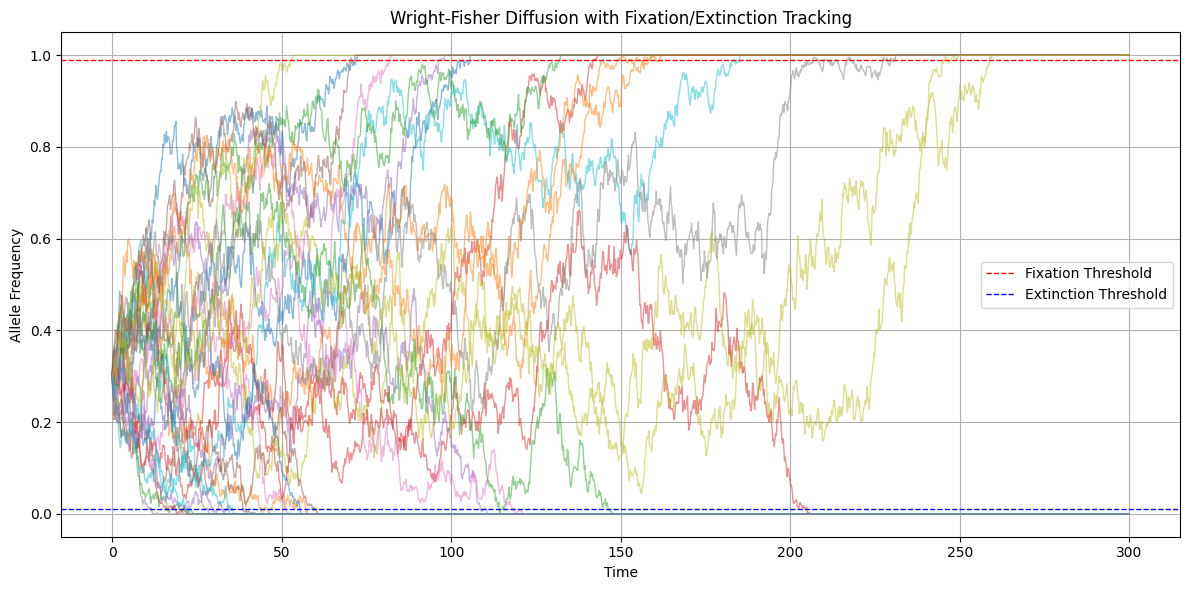


 Results:
Estimated Fixation Probability: 0.460
Estimated Extinction Probability: 0.487
Theoretical Fixation Probability (s = 0.01): 0.410


(np.float64(0.46),
 np.float64(0.4866666666666667),
 np.float64(0.41001953772646843))

In [14]:
wright_fisher_simulation_fixation_user(
    s_val=0.01,
    mu_val=0.0,
    nu_val=0.0,
    N_val=50,
    p0=0.3,
    t_max=300,
    dt=0.2,
    n_paths=300,
    epsilon=0.01
)
